# Groundhog Day 2024

## Setup: Libraries

In [3]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [4]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-01-30/groundhogs.csv'

draw =  pd.read_csv(url)
draw.head(3)

,id,slug,shortname,name,city,region,country,latitude,longitude,source,current_prediction,is_groundhog,type,active,description,image,predictions_count
0,1,punxsutawney-phil,Phil,Punxsutawney Phil,Punxsutawney,Pennsylvania,USA,40.931199,-78.962248,https://www.groundhog.org/history-past-predict...,https://www.cbsnews.com/news/groundhog-day-202...,True,Groundhog,True,Punxsutawney Phil is a superstar prognosticati...,https://groundhog-day.com/images/ghogs/punxsut...,128
1,2,octoraro-orphie,Orphie,Octoraro Orphie,Quarryville,Pennsylvania,USA,39.825541,-76.091957,http://home.ptd.net/\%7Emsvitale/index.html,https://lancasteronline.com/news/local/groundh...,False,Taxidermied groundhog,True,"Octoraro Orphie, from Quarryville Pennsylvania...",https://groundhog-day.com/images/ghogs/octorar...,91
2,3,wiarton-willie,Willie,Wiarton Willie,Wiarton,Ontario,Canada,44.743869,-81.138684,https://www.southbrucepeninsula.com/en/explore...,https://twitter.com/WiartonWillie/status/16211...,True,Groundhog,True,Wiarton Wille is Canada’s most famous prognost...,https://groundhog-day.com/images/ghogs/wiarton...,60


In [5]:
draw.columns

Index(['id', 'slug', 'shortname', 'name', 'city', 'region', 'country',
       'latitude', 'longitude', 'source', 'current_prediction', 'is_groundhog',
       'type', 'active', 'description', 'image', 'predictions_count'],
      dtype='object')

In [18]:
draw[['region', 'country', 'is_groundhog',  'type', 'active', 'predictions_count']].head(3)

,region,country,is_groundhog,type,active,predictions_count
0,Pennsylvania,USA,True,Groundhog,True,128
1,Pennsylvania,USA,False,Taxidermied groundhog,True,91
2,Ontario,Canada,True,Groundhog,True,60


In [21]:
df = (
    draw.loc[:, ('region', 'country', 'is_groundhog',  'type', 'active', 'predictions_count')]
    .rename(columns  = {'is_groundhog': 'groundhog', 'predictions_count': 'predcount'})
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   region     75 non-null     object
 1   country    75 non-null     object
 2   groundhog  75 non-null     bool  
 3   type       75 non-null     object
 4   active     75 non-null     bool  
 5   predcount  75 non-null     int64 
dtypes: bool(2), int64(1), object(3)
memory usage: 2.6+ KB


## EDA

In [42]:
region_df  = df['region'].value_counts().reset_index()
region_df[(region_df['count'] >= 3)]

,region,count
0,Pennsylvania,15
1,New York,6
2,Ontario,6
3,Ohio,4
4,North Carolina,3
5,Nova Scotia,3
6,Connecticut,3


In [49]:
region_df.loc[(region_df['count'] < 3), 'region'] = 'Other'
rgn_df = region_df.groupby('region')['count'].sum().reset_index().sort_values('count', ascending = False)
rgn_df

,region,count
6,Other,35
7,Pennsylvania,15
1,New York,6
5,Ontario,6
4,Ohio,4
0,Connecticut,3
2,North Carolina,3
3,Nova Scotia,3


AttributeError: 'Axes' object has no attribute 'set_major_formatter'

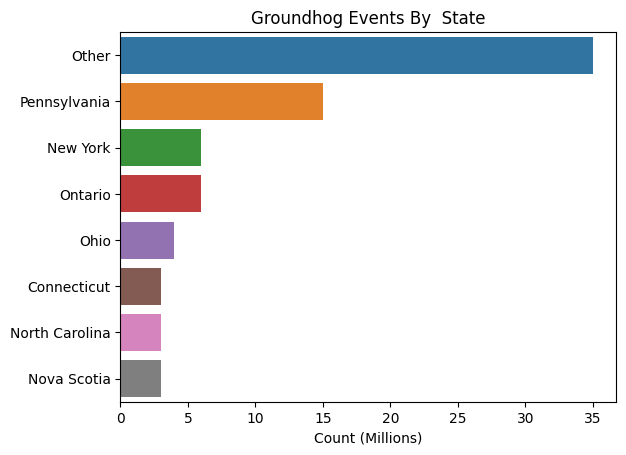

In [62]:
g = sns.barplot(
    rgn_df, x="count", y="region", hue="region", 
    legend=False)
g.set(xlabel="Count (Millions)", ylabel="")
g.set_title("Groundhog Events By  State")
g.set_major_formatter('${x:.0f}')